In [6]:
# Using the intervals of a given scale as indexes.
# Two octaves worth of notes
whole_notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G',
                    'G#', 'A', 'A#', 'B'] * 3
# Example, index where element 'B' is located.
root = whole_notes.index('B')

# Starting from this index, slice 12 elements
B = whole_notes[root:root + 12]

print(B) # B Chromatic scale


['B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#']


In [7]:
# Using the major scale intervals to retrive the B major scale
major_scale = [0, 2, 4, 5, 7, 9, 11]

notes = [B[i] for i in major_scale]
print("B major scale:", notes)

# Notes contained in another scale,
another_scale = [0, 2, 5, 10, 11]
notes = [B[i] for i in another_scale]
print('Some scale: ', notes)


B major scale: ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
Some scale:  ['B', 'C#', 'E', 'A', 'A#']


### Step 1 - A function that retrieves of the notes in scale

In [8]:
## STEP 1
# A function that summarises the above code, to retrieve any major_scale
def get_notes(key, intervals):
    """Given any key C, C#...B
        and intervals z.B Tone Tone Semitone"""

    whole_notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G',
                    'G#', 'A', 'A#', 'B'] * 3 # A long seq. of notes to slice from

    root = whole_notes.index(key) # Finding start of slice
    octave = whole_notes[root:root + 13] # taking 12 consecutive elements
    return [octave[i] for i in intervals] # accessing indexes specified by 'intervals' to retrive notes


## STEP 2
### Creating a dict with commone musical scales!

In [11]:
scales = {
    "major" : [0, 2, 4, 5, 7, 9, 11],
    "minor" : [0, 2, 3, 5, 7, 10, 11],
    "dorian" : [0, 2, 3, 4, 7, 9, 10, 12],
    "phrygian" : [0, 1, 3, 5, 7, 8, 10, 12],
    "minor_pentatonic" : [0, 3, 5, 7, 10],
    "major_pentatonic" : [0, 2, 4, 7, 9],
    "harmonic_minor" : [0, 2, 3, 5, 7, 8, 10, 12],
    "mixolydian" : [0, 2, 4, 5, 7, 9, 10],
    "minor_blues" : [0, 3, 5, 6, 7, 10],
    "locrian" : [0, 1, 3, 5, 6, 8, 10, 12],
    "lydian" : [0, 2, 4, 6, 7, 9, 11, 12],
}

# Now, we have an easy way of accessing the notes of any scale, start at any root!
#print("A minor scale: ", get_notes('A', scales['minor']))
# print("Test: ", get_notes('E', scales['minor_blues']))

## STEP 3 MAKING THE GUITAR


In [12]:
# making a dict with the name of the strings as its keys
strings = {i:0 for i in 'EADGB'}
for i in strings.keys():
    start = whole_notes.index(i)
    strings[i] = whole_notes[start:start + 20] # Shows up in ErrorLens, but runs without error?

# print(strings.keys())
# print("Notes on the E string: ", strings['E'])

# Finding notes on a guitar function
def find_notes(scale):
    notes_strings = {i:0 for i in "EADGB"}
    
    # for ever string
    for key in strings.keys():
        # create an empty list of indexes
        indexes = []
        for note in scale:
            # append index where note of the scale is found in 
            ind = strings[key].index(note)
            indexes.append(ind)
            # because where are 20 frets, there are duplicate notes in the string
            if ind <= 7:
                # must also append these to indexes
                indexes.append(ind + 13)
        notes_strings[key] = indexes
    return notes_strings



In [13]:
# finding notes in a scale:
C_minor_blues = get_notes('C', scales['minor_blues'])
# finding positions of these notes in the guitar, as a dict
positions = find_notes(C_minor_blues)
print('Position of C minor blues in the guitar:')
for i in positions.keys():
    print('Notes in the {} string {}'.format(i, positions[i]))

Position of C minor blues in the guitar:
Notes in the E string [8, 11, 1, 14, 2, 15, 3, 16, 6, 19]
Notes in the A string [3, 16, 6, 19, 8, 9, 10, 1, 14]
Notes in the D string [10, 1, 14, 3, 16, 4, 17, 5, 18, 8]
Notes in the G string [5, 18, 8, 10, 11, 0, 13, 3, 16]
Notes in the B string [1, 14, 4, 17, 6, 19, 7, 20, 8, 11]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


In [17]:
def plot(key, intervals, night = True):
    scale = get_notes(key, intervals)

    # plot strings
    fig, ax = plt.subplots(figsize=(20, 6))
    background = ['white', 'black']
    for i in range(1, 7):
        ax.plot([i for a in range(22)])

    # plot frets
    for i in range(1, 21):
        # decorates the twelve frets with a gray and thick fret
        if i == 12:
            ax.axvline(x = i, color = 'gray', linewidth = 3.5)
            continue
        # trace a vertical line (a fret)
        ax.axvline(x = i, color = background[night - 1], linewidth = 0.5)
    ax.set_axisbelow(True)

    # setting height and width of displayed guitar
    ax.set_xlim([0, 21]) # freth length...? yes.
    ax.set_ylim([0.4, 6.5])
    # setting color of the background using argument night
    ax.set_facecolor(background[night])
    # finding note positions of the scale in the guitar
    to_plot = find_notes(scale)

    # for ever note of the scal ein every string, make a circle
    # with the note's name as label for the corresponding fret
    for y_val, key in zip([1, 2, 3, 4, 5, 6], 'EADGBE'):
        for i in to_plot[key]:
            font = 12
            x = i+0.5 # shift the circles
            p = mpatches.Circle((x, y_val), 0.2)
            ax.add_patch(p)
            note =  strings[key][i]
            # if note is the root make it a big bigger
            if note == scale[0]:
                font = 14.5
            # add label to middle of the circle
            ax.annotate(note, (i+0.5, y_val), color = 'w', weight = 'bold',
                            fontsize = font, ha = 'center', va = 'center')

    plt.title('_|_|_|_|_|' * 16)
    plt.yticks(np.arange(1, 7), ['E', 'A', 'D', 'G', 'B', 'E'])
    plt.xticks(np.arange(21)+0.5, np.arange(0, 22))
    plt.show


AttributeError: 'AxesSubplot' object has no attribute 'avline'

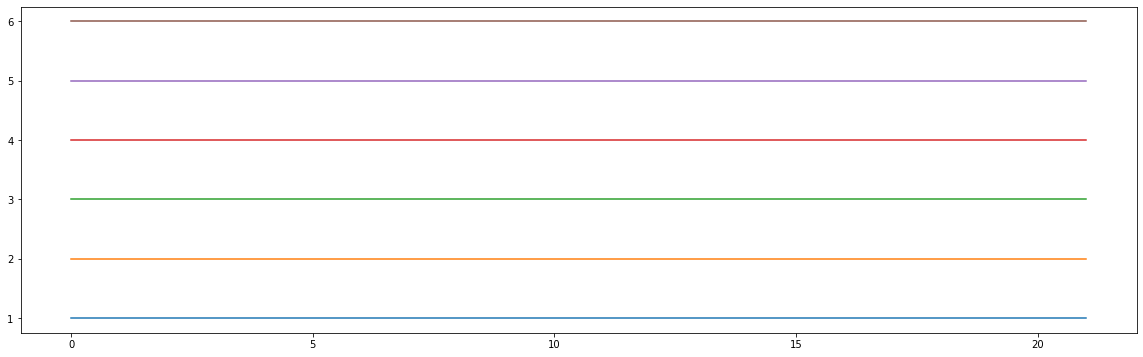

In [16]:
plot('C', scales['major'])